In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ants
import nibabel as nib
from time import time
from xml.etree import ElementTree as ET
import os
import pandas as pd
import sys
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter
from scipy import signal
from scipy.ndimage import zoom

sys.path.insert(0, '/home/users/brezovec/projects/lysis/')
from bruker import *

%matplotlib inline

In [2]:
def load_brain(file):
    try:
        brain = nib.load(file).get_data()
        brain = np.swapaxes(brain, 0, 1)
        brain = np.squeeze(brain)
        brain = ants.from_numpy(brain)
    except:
        brain = None
    return brain

def rotate_brain(brain):
    try:
        if type(brain) is not np.ndarray:
            brain = brain.numpy()
        brain = np.swapaxes(brain, 0, 1)
        brain = ants.from_numpy(brain)
    except:
        brain = None
    return brain

def remove_empty_axes(brain):
    if type(brain) is not np.ndarray:
        brain = brain.numpy()
    brain = np.squeeze(brain)
    brain = ants.from_numpy(brain)
    return brain

def load_brains_from_dir(folder):
    brain_files = sorted(os.listdir(folder))
    full_brain_files = [folder+brain_file for brain_file in brain_files]
    brains = [load_brain(brain) for brain in full_brain_files]
    return brains

def set_resolution(brain, xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    statevalues = root.findall('PVStateShard')[0].findall('PVStateValue')
    for statevalue in statevalues:
        key = statevalue.get('key')
        if key == 'micronsPerPixel':
            indices = statevalue.findall('IndexedValue')
            for index in indices:
                axis = index.get('index')
                if axis == 'XAxis':
                    x = float(index.get('value'))
                elif axis == 'YAxis':
                    y = float(index.get('value'))
                elif axis == 'ZAxis':
                    z = float(index.get('value'))
                else:
                    print('Error')
    try:
        brain.set_spacing([x,y,z])
    except:
        pass

In [3]:
brain_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_8/functional.nii'

In [37]:
save_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20181226_meanbrain_creation/mot_corr'

In [10]:
brains = load_brains_from_dir(brain_folder)

NotADirectoryError: [Errno 20] Not a directory: '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_7/functional.nii'

In [4]:
brains = [load_brain(brain_folder)]

In [5]:
3

3

In [6]:
meanbrains = []
for i, brain in enumerate(brains):
    print(i)
    try:
        meanbrains.append(ants.from_numpy(brain.mean(3)))
    except:
        meanbrains.append(None)

0


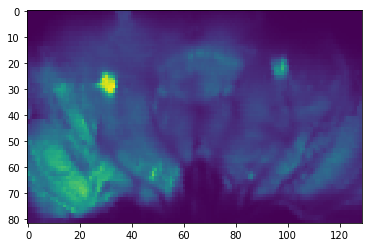

In [7]:
plt.imshow(meanbrains[0][:,:,20])

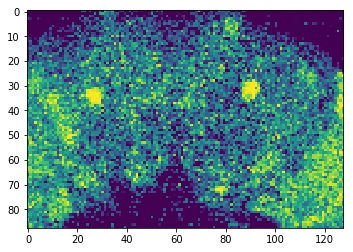

In [31]:
plt.imshow(brains[0][:,:,20,0])

In [22]:
brains[4]

In [ ]:
for j, brain in enumerate(brains):
    t0 = time()
    
    try:
        motCorr_brain = []
        transforms = []
        numpy_brain = brain.numpy()

        for i in range(np.shape(numpy_brain)[3]):
            t00 = time()
            brain_vol = ants.from_numpy(numpy_brain[:,:,:,i])
            motCorr_vol = ants.registration(meanbrains[j], brain_vol, type_of_transform='SyN')
            motCorr_brain.append(motCorr_vol['warpedmovout'].numpy())
            transforms.append(motCorr_vol['fwdtransforms'])
            print(i, time()-t00)
            
        # save motcorr brain
        try:
            motCorr_brain = np.moveaxis(np.asarray(motCorr_brain),0,3)
            motCorr_brain_ants = ants.from_numpy(motCorr_brain)
            #save_file = os.path.join(save_folder, 'brain_' + str(j+1) + '.nii')
            ants.image_write(motCorr_brain_ants, save_file)
            print(save_file)
        except:
            print('save failed')
            
    except:
        print('main try failed')
    print(time()-t0)

0 3.66264271736145
1 3.64612078666687
2 3.5252065658569336
3 3.513719320297241
4 3.4863336086273193
5 3.6054346561431885
6 3.3446011543273926
7 3.634951591491699
8 3.4339466094970703
9 3.5940732955932617
10 3.661170721054077
11 3.643878221511841
12 3.6363778114318848
13 3.8297505378723145
14 3.6458213329315186
15 3.6056957244873047
16 3.453857183456421
17 3.989959239959717
18 3.28185772895813
19 3.76369309425354
20 3.411839246749878
21 3.4601500034332275
22 3.1211957931518555
23 3.8286571502685547
24 3.448822259902954
25 3.7698752880096436
26 3.992659568786621
27 3.8721208572387695
28 3.469953775405884
29 3.4032604694366455
30 3.0795114040374756
31 3.0953431129455566
32 3.3953158855438232
33 3.2552144527435303
34 4.16830039024353
35 4.036360263824463
36 4.107591152191162
37 3.50824236869812
38 3.417250633239746
39 3.3028929233551025
40 4.031981945037842
41 3.7011544704437256
42 3.679955005645752
43 3.5358264446258545
44 3.1185789108276367
45 3.7974772453308105
46 3.5866358280181885
47 

In [ ]:
save_as = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_7/mot_corr.nii'

for j, brain in enumerate(brains):
    t0 = time()
    
    try:
        motCorr_brain = []
        transforms = []
        numpy_brain = brain.numpy()

        for i in range(np.shape(numpy_brain)[3]):
            t00 = time()
            brain_vol = ants.from_numpy(numpy_brain[:,:,:,i])
            motCorr_vol = ants.registration(meanbrains[j], brain_vol, type_of_transform='SyN')
            motCorr_brain.append(motCorr_vol['warpedmovout'].numpy())
            transforms.append(motCorr_vol['fwdtransforms'])
            print(i, time()-t00)
            
        # save motcorr brain
        try:
            motCorr_brain = np.moveaxis(np.asarray(motCorr_brain),0,3)
            motCorr_brain_ants = ants.from_numpy(motCorr_brain)
            #save_file = os.path.join(save_folder, 'brain_' + str(j+1) + '.nii')
            ants.image_write(motCorr_brain_ants, save_as)
            #print(save_file)
        except:
            print('save failed')
            
    except:
        print('main try failed')
    print(time()-t0)

0 3.9944870471954346
1 4.214066028594971
2 4.336906433105469
3 4.030578136444092
4 3.7987070083618164
5 3.894943952560425
6 4.112271070480347
7 3.8822455406188965
8 4.357765436172485
9 4.478026628494263
10 4.0071797370910645
11 3.927306890487671
12 4.838088512420654
13 3.961378574371338
14 3.979846954345703
15 4.292401313781738
16 4.3038153648376465
17 3.905360460281372
18 4.040473937988281
19 4.251058340072632
20 4.254723072052002
21 4.358844518661499
22 4.645906925201416
23 3.821244716644287
24 4.279861211776733
25 3.9802157878875732
26 3.99013090133667
27 3.9708704948425293
28 4.499940872192383
29 4.437604904174805
30 3.8930020332336426
31 4.215982675552368
32 3.939779043197632
33 4.144069671630859
34 4.034723281860352
35 3.946084976196289
36 4.465718507766724
37 4.464539527893066
38 4.4849042892456055
39 3.971489429473877
40 4.499718189239502
41 3.882283926010132
42 4.885220050811768
43 4.585850238800049
44 4.103734970092773
45 4.387295722961426
46 4.165600061416626
47 3.9085400104

375 4.347196102142334
376 4.215235710144043
377 3.6951003074645996
378 4.568480968475342
379 4.497934341430664
380 4.206212759017944
381 3.910543441772461
382 4.370970964431763
383 4.013511419296265
384 4.3923468589782715
385 4.714828968048096
386 4.497283697128296
387 4.102571964263916
388 4.560334920883179
389 4.780824422836304
390 4.465456247329712
391 4.538558721542358
392 4.642281770706177
393 4.071948051452637
394 4.438352108001709
395 4.118171691894531
396 3.856302261352539
397 4.1381659507751465
398 4.031311273574829
399 4.790839433670044
400 4.278635025024414
401 3.9781007766723633
402 5.108992099761963
403 3.977705717086792
404 4.532834053039551
405 3.7727456092834473
406 4.601999998092651
407 3.7697911262512207
408 4.403180360794067
409 4.405396223068237
410 4.231267929077148
411 4.082087755203247
412 4.326653480529785
413 4.1322925090789795
414 4.39560604095459
415 4.281164169311523
416 4.116863489151001
417 4.552441596984863
418 4.893937826156616
419 4.097086668014526
420 

744 5.62638258934021
745 6.656723499298096
746 12.01908278465271
747 10.899577379226685
748 11.741968393325806
749 7.71205735206604
750 5.9029221534729
751 15.595106601715088
752 14.48248815536499
753 15.81369686126709
754 5.4427125453948975
755 5.982171297073364
756 7.512463569641113
757 7.237321615219116
758 13.612943649291992
759 15.424091815948486
760 11.701026678085327
761 11.21757960319519
762 4.342067241668701
763 10.5566565990448
764 17.655554056167603
765 13.51038122177124
766 14.330010414123535
767 10.231264114379883
768 6.455164194107056
769 9.212186574935913
770 15.000057935714722
771 4.901075839996338
772 17.207831859588623
773 6.730003356933594
774 10.131443500518799
775 8.662084341049194
776 19.376902103424072
777 9.269495964050293
778 5.6813881397247314
779 7.074292182922363
780 16.191057443618774
781 15.447113990783691
782 15.650800466537476
783 17.55376625061035
784 5.327877998352051
785 12.215282678604126
786 16.772801399230957
787 16.305156469345093
788 19.748106718

1109 4.139543056488037
1110 4.220959901809692
1111 6.294063568115234
1112 4.644080400466919
1113 4.001739740371704
1114 4.368447542190552
1115 4.545824766159058
1116 3.8167495727539062
1117 3.8011679649353027
1118 4.1053595542907715
1119 4.212748050689697
1120 4.131213665008545
1121 3.961501121520996
1122 4.90191650390625
1123 3.771639108657837
1124 3.7391390800476074
1125 4.670766592025757
1126 4.028295040130615
1127 4.54687237739563
1128 4.067147254943848
1129 3.932210683822632
1130 4.527984380722046
1131 4.493143558502197
1132 4.045886039733887
1133 4.459632873535156
1134 4.266891241073608
1135 4.468149900436401
1136 4.073025703430176
1137 4.121105670928955
1138 4.1990251541137695
1139 4.283844947814941
1140 4.002728462219238
1141 4.496538877487183
1142 4.281335830688477
1143 4.289160251617432
1144 4.360977411270142
1145 4.004634618759155
1146 4.259812355041504
1147 4.476762294769287
1148 4.905415296554565
1149 7.100876331329346
1150 6.761339902877808
1151 7.988945722579956
1152 11.

1464 3.7162516117095947
1465 4.295659303665161
1466 4.46823525428772
1467 4.048287630081177
1468 4.290583848953247
1469 4.27954363822937
1470 5.095022201538086
1471 4.294072389602661
1472 4.2886059284210205
1473 4.097640514373779
1474 3.6214425563812256
1475 4.087586164474487
1476 3.866190195083618
1477 3.7300567626953125
1478 4.307332992553711
1479 3.784182548522949
1480 3.7358412742614746
1481 4.290010213851929
1482 3.906907558441162
1483 4.0330915451049805
1484 3.8184163570404053
1485 4.642169952392578
1486 3.8984787464141846
1487 4.009361267089844
1488 4.129701375961304
1489 4.101494073867798
1490 4.1942174434661865
1491 3.9675443172454834
1492 4.552705764770508
1493 3.889824390411377
1494 3.821211338043213
1495 4.531624794006348
1496 4.262330055236816
1497 4.1578757762908936
1498 4.065877676010132
1499 4.095032453536987
1500 4.0691163539886475
1501 4.321066856384277
1502 4.3925557136535645
1503 4.6617326736450195
1504 3.7846250534057617
1505 3.8775947093963623
1506 3.9934515953063

1817 5.747351169586182
1818 5.372058629989624
1819 6.597963571548462
1820 8.32592248916626
1821 9.347885370254517
1822 9.119092226028442
1823 7.765835523605347
1824 11.565864086151123
1825 10.465983629226685
1826 11.15337610244751
1827 10.766714096069336
1828 13.474627256393433
1829 11.645564079284668
1830 14.677587032318115
1831 5.330432415008545
1832 5.670298337936401
1833 7.140010833740234
1834 10.265434503555298
1835 9.029536962509155
1836 9.731865882873535
1837 10.545655250549316
1838 8.692505598068237
1839 12.49193549156189
1840 9.924489498138428
1841 11.319715738296509
1842 10.28032112121582
1843 11.756462335586548
1844 7.745302200317383
1845 7.25455904006958
1846 5.910156726837158
1847 7.952074766159058
1848 9.947293281555176
1849 11.520155668258667
1850 8.563143014907837
1851 10.437177181243896
1852 9.970077276229858
1853 9.860592365264893
1854 11.234723329544067
1855 13.031280994415283
1856 10.785500288009644
1857 9.417771816253662
1858 9.154772996902466
1859 13.7291073799133

In [ ]:
folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20181226_meanbrain_creation/func_to_template'

for i, fly in enumerate(flies):
    try:
        save_file = os.path.join(folder, 'brain_' + str(i+1) + '.nii')
        ants.image_write(fly.func2template, save_file)
    except:
        pass

In [ ]:
3

In [15]:
numpy_brain = brains[0].numpy()

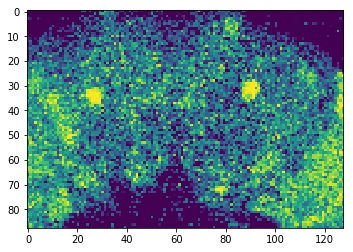

In [16]:
plt.imshow(numpy_brain[:,:,20,0])

In [12]:
np.shape(brains[0].numpy())[3]

4006

In [13]:
brains[0]

ANTsImage
	 Pixel Type : float
	 Components : 1
	 Dimensions : (88, 128, 55, 4006)
	 Spacing    : (1.0, 1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]

In [5]:
nib_brain = nib.load(brain_file).get_data()
#nib_brain = np.swapaxes(nib_brain, 0, 1)
brain = ants.from_numpy(nib_brain)

In [6]:
meanbrain = brain.mean(3)
meanbrain = ants.from_numpy(meanbrain)

In [80]:
np.shape(nib_brain)[3]

4006

In [82]:
motCorr_brain = []
transforms = []
t0 = time()
for i in range(np.shape(nib_brain)[3]):
    t00 = time()
    brain_slice = ants.from_numpy(nib_brain[:,:,:,i])
    motCorr_slice = ants.registration(meanbrain, brain_slice, type_of_transform='SyN')
    motCorr_brain.append(motCorr_slice['warpedmovout'].numpy())
    transforms.append(motCorr_slice['fwdtransforms'])
    
    print(i, time()-t00)
print(time()-t0)

0 4.476713418960571
1 4.603055238723755
2 4.152091979980469
3 4.980680465698242
4 4.225503444671631
5 3.5323398113250732
6 4.4549407958984375
7 4.512315988540649
8 4.2307448387146
9 4.184659481048584
10 4.254926681518555
11 4.295639514923096
12 3.933544158935547
13 4.402287483215332
14 5.049320697784424
15 4.238244295120239
16 4.279607057571411
17 4.348146200180054
18 3.923206090927124
19 4.226565599441528
20 4.063549280166626
21 4.161097526550293
22 4.000920534133911
23 4.209366321563721
24 4.255273103713989
25 4.141505241394043
26 3.9273338317871094
27 4.332871913909912
28 4.832554817199707
29 4.411760330200195
30 3.9868409633636475
31 4.203432321548462
32 4.688737154006958
33 3.9848875999450684
34 3.8120062351226807
35 4.187930107116699
36 4.5978899002075195
37 4.016043663024902
38 4.274612903594971
39 4.235994338989258
40 4.921741724014282
41 5.6900718212127686
42 7.4226531982421875
43 7.320855140686035
44 4.987958908081055
45 10.651424646377563
46 9.736835241317749
47 10.830444335

375 4.3983001708984375
376 4.699598789215088
377 4.582350015640259
378 3.783057928085327
379 3.9172558784484863
380 4.133207082748413
381 4.0514092445373535
382 3.9263250827789307
383 4.439807891845703
384 4.321652889251709
385 4.135953426361084
386 4.320902585983276
387 4.083529710769653
388 4.345998048782349
389 3.9668025970458984
390 4.016293048858643
391 3.7143213748931885
392 4.248011112213135
393 3.4608962535858154
394 4.567274570465088
395 4.142245769500732
396 3.796891450881958
397 4.717393159866333
398 4.5355024337768555
399 3.7562942504882812
400 4.148390531539917
401 3.736861228942871
402 4.399334907531738
403 3.9955406188964844
404 4.198163747787476
405 4.377509117126465
406 4.061957359313965
407 3.9168479442596436
408 4.325525760650635
409 4.342530965805054
410 3.9576752185821533
411 4.160872459411621
412 4.515747547149658
413 3.4326021671295166
414 3.6700053215026855
415 3.8731727600097656
416 4.701248645782471
417 4.2677247524261475
418 4.168629884719849
419 4.8255822658

745 4.3090996742248535
746 4.745110750198364
747 4.349819898605347
748 4.282001733779907
749 4.583256483078003
750 3.801853895187378
751 4.992455244064331
752 3.8581457138061523
753 4.348296880722046
754 4.550624132156372
755 4.227861404418945
756 3.879072427749634
757 4.086762189865112
758 4.9906768798828125
759 4.272150278091431
760 4.102126121520996
761 4.4300549030303955
762 4.423281669616699
763 4.941107273101807
764 4.2899603843688965
765 4.321704626083374
766 4.022099733352661
767 4.459819316864014
768 4.3511738777160645
769 5.625670433044434
770 5.297235727310181
771 4.535406112670898
772 3.969379186630249
773 4.59045934677124
774 4.282673358917236
775 4.65567684173584
776 4.321101903915405
777 4.3976922035217285
778 4.472170829772949
779 4.797915935516357
780 4.404801607131958
781 4.356122970581055
782 4.567237138748169
783 4.5459606647491455
784 4.529276609420776
785 6.226056814193726
786 4.251645088195801
787 4.49238657951355
788 4.33270525932312
789 3.933518648147583
790 4.

1111 3.9681031703948975
1112 4.0415380001068115
1113 3.6640727519989014
1114 4.4235289096832275
1115 4.576109170913696
1116 4.081606864929199
1117 4.868046522140503
1118 4.5636162757873535
1119 4.183538198471069
1120 4.041449308395386
1121 4.6473259925842285
1122 4.32613468170166
1123 4.1309974193573
1124 4.394066333770752
1125 4.519603967666626
1126 3.765199899673462
1127 4.4586381912231445
1128 4.3732383251190186
1129 3.693112850189209
1130 3.8173911571502686
1131 4.492637634277344
1132 4.194975137710571
1133 4.3505024909973145
1134 4.220744609832764
1135 5.173932075500488
1136 4.451719522476196
1137 4.519545793533325
1138 4.3910839557647705
1139 3.8474981784820557
1140 3.577699899673462
1141 4.385234832763672
1142 4.675943851470947
1143 4.137289762496948
1144 4.1495325565338135
1145 4.565542697906494
1146 4.399921655654907
1147 4.8837456703186035
1148 4.311420202255249
1149 5.224512577056885
1150 3.6208505630493164
1151 4.631230354309082
1152 4.455399990081787
1153 3.638732433319092

1465 3.7466371059417725
1466 4.043971300125122
1467 3.894120931625366
1468 3.969808578491211
1469 4.650277137756348
1470 4.740446090698242
1471 4.373691558837891
1472 4.069528102874756
1473 3.9670400619506836
1474 3.903780698776245
1475 4.575934410095215
1476 3.6841928958892822
1477 3.4854204654693604
1478 4.249996662139893
1479 4.0250303745269775
1480 3.73775315284729
1481 4.2152485847473145
1482 3.942981004714966
1483 4.072272300720215
1484 4.026366949081421
1485 5.496180772781372
1486 4.009939670562744
1487 3.980246067047119
1488 3.9921393394470215
1489 4.459088325500488
1490 4.269586801528931
1491 4.185605764389038
1492 4.469595432281494
1493 4.058182239532471
1494 3.842589855194092
1495 4.19739842414856
1496 4.286117076873779
1497 5.09228253364563
1498 3.831496238708496
1499 4.4601991176605225
1500 4.289506673812866
1501 4.698045969009399
1502 4.0136497020721436
1503 4.564216613769531
1504 3.5170950889587402
1505 5.267759799957275
1506 5.114044427871704
1507 4.369811773300171
1508

KeyboardInterrupt: 

In [ ]:
# last good was 1737

In [20]:
motCorr_brain = np.moveaxis(np.asarray(motCorr_brain),0,3)
motCorr_brain_ants = ants.from_numpy(motCorr_brain)

In [64]:
ants.image_write(z, save_file)

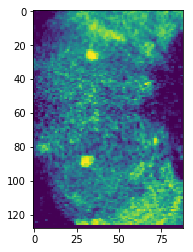

In [14]:
plt.imshow(motCorr_brain_ants[:,:,20,0])

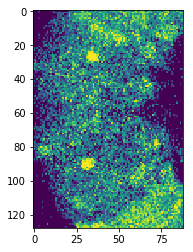

In [15]:
plt.imshow(brain[:,:,20,0])

In [74]:
transform_params = []

for i in range(len(transforms)):
    print(i)
    params = ants.read_transform(transforms[i][0]).parameters
    transform_params.append(params)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: list index out of range

In [73]:
len()

4006

In [78]:
transforms[2000]

[]

In [2]:
1738*3

5214

In [3]:
brain_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20181217/fly2/TSeries-12172018-1322-001.nii'
nib_brain = nib.load(brain_file).get_data()
#nib_brain = np.swapaxes(nib_brain, 0, 1)
channel_1 = ants.from_numpy(np.asarray(nib_brain)[:,:,:,:,0])

KeyError: 'fromNumpyF5'

In [8]:
channel_2 = ants.from_numpy(np.asarray(nib_brain)[:,:,:,:,1])

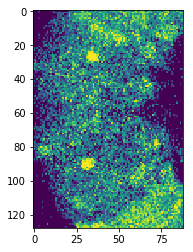

In [10]:
plt.imshow(channel_2[:,:,20,0])

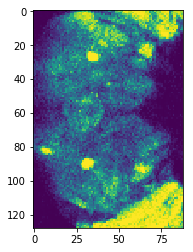

In [9]:
plt.imshow(channel_1[:,:,20,0])

In [5]:
np.shape(nib_brain)

(128, 88, 55, 4006, 2)

In [11]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20181217/fly2/red.nii'
ants.image_write(channel_1, save_file)

In [12]:
save_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20181217/fly2/green.nii'
ants.image_write(channel_2, save_file)